In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dtypes = {"item_id": object, "brand_id": object, "user_id": object}

knownpath = os.path.join("..", "data", "BADS_WS1819_known.csv")
known = pd.read_csv(knownpath, parse_dates=["order_date", "delivery_date", "user_dob", "user_reg_date"],
                    index_col=["order_item_id"], dtype=dtypes, na_values=["not_reported", "?"])

## Return rates by size

In [6]:
item_size_mean = known.groupby("item_size")["return"].mean()
item_size_counts = known.groupby("item_size")["return"].count()

pd.DataFrame([item_size_counts, item_size_mean]).T

,return,return
item_size,,
1,30.0,0.466667
10,216.0,0.569444
10+,151.0,0.490066
100,3.0,0.333333
104,48.0,0.208333
105,1.0,0.000000
11,152.0,0.578947
11+,17.0,0.411765
116,65.0,0.215385


### Crazy idea: why not Weight of Evidence?
$$
WOE = \log\left( \frac{\text{% of events}}{\text{% of non-events}} \right)
$$

In [25]:
def get_woe(DF, var):
    events = DF.groupby(var)["return"].sum()
    non_events = DF.groupby(var)["return"].count() - events

    events.loc[events == 0] = 0.5
    non_events.loc[non_events == 0] = 0.5

    total_events = DF["return"].sum()
    total_non_events = len(DF) - total_events

    woe = np.log((events/total_events) / (non_events/total_non_events))
    return woe

In [26]:
get_woe(known, "brand_id")

brand_id
101    0.140574
102   -0.073819
103   -0.378423
104   -0.010215
105   -0.093653
106    0.049566
107   -1.444195
108   -0.381000
109    0.195926
110   -0.893115
111    0.317392
112    0.216173
113   -0.245381
114    0.216314
115   -0.605476
116    0.394171
117    0.148108
118    0.305117
119    0.111912
120    0.477725
121    0.278143
122   -0.857075
123    0.111687
124    0.259484
125    0.549650
126    0.550548
127   -1.638148
128    0.123170
129    0.064050
130   -0.348506
         ...   
231   -0.332393
232   -3.838951
234   -2.006369
235   -0.620075
236   -1.718687
237    0.073072
238    1.459367
241   -0.620075
242   -0.700117
244    0.073072
245    0.273743
246   -0.689068
247    0.706796
248    0.632688
249   -0.898788
250    0.121863
251    0.197125
252    0.953431
253    0.073072
254   -2.229513
255   -4.175423
256    0.360755
257   -1.313222
258    0.766220
259   -2.229513
260   -1.313222
262   -0.774225
263   -2.229513
265    0.673846
266    0.073072
Name: return, L

## Return rates by brand

In [7]:
brand_id_mean = known.groupby("brand_id")["return"].mean()
brand_id_counts = known.groupby("brand_id")["return"].count()

pd.DataFrame([brand_id_counts, brand_id_mean]).T

,return,return
brand_id,,
101,7499.0,0.516869
102,682.0,0.463343
103,13370.0,0.389005
104,889.0,0.479190
105,8176.0,0.458415
106,1957.0,0.494124
107,884.0,0.179864
108,224.0,0.388393
109,652.0,0.530675


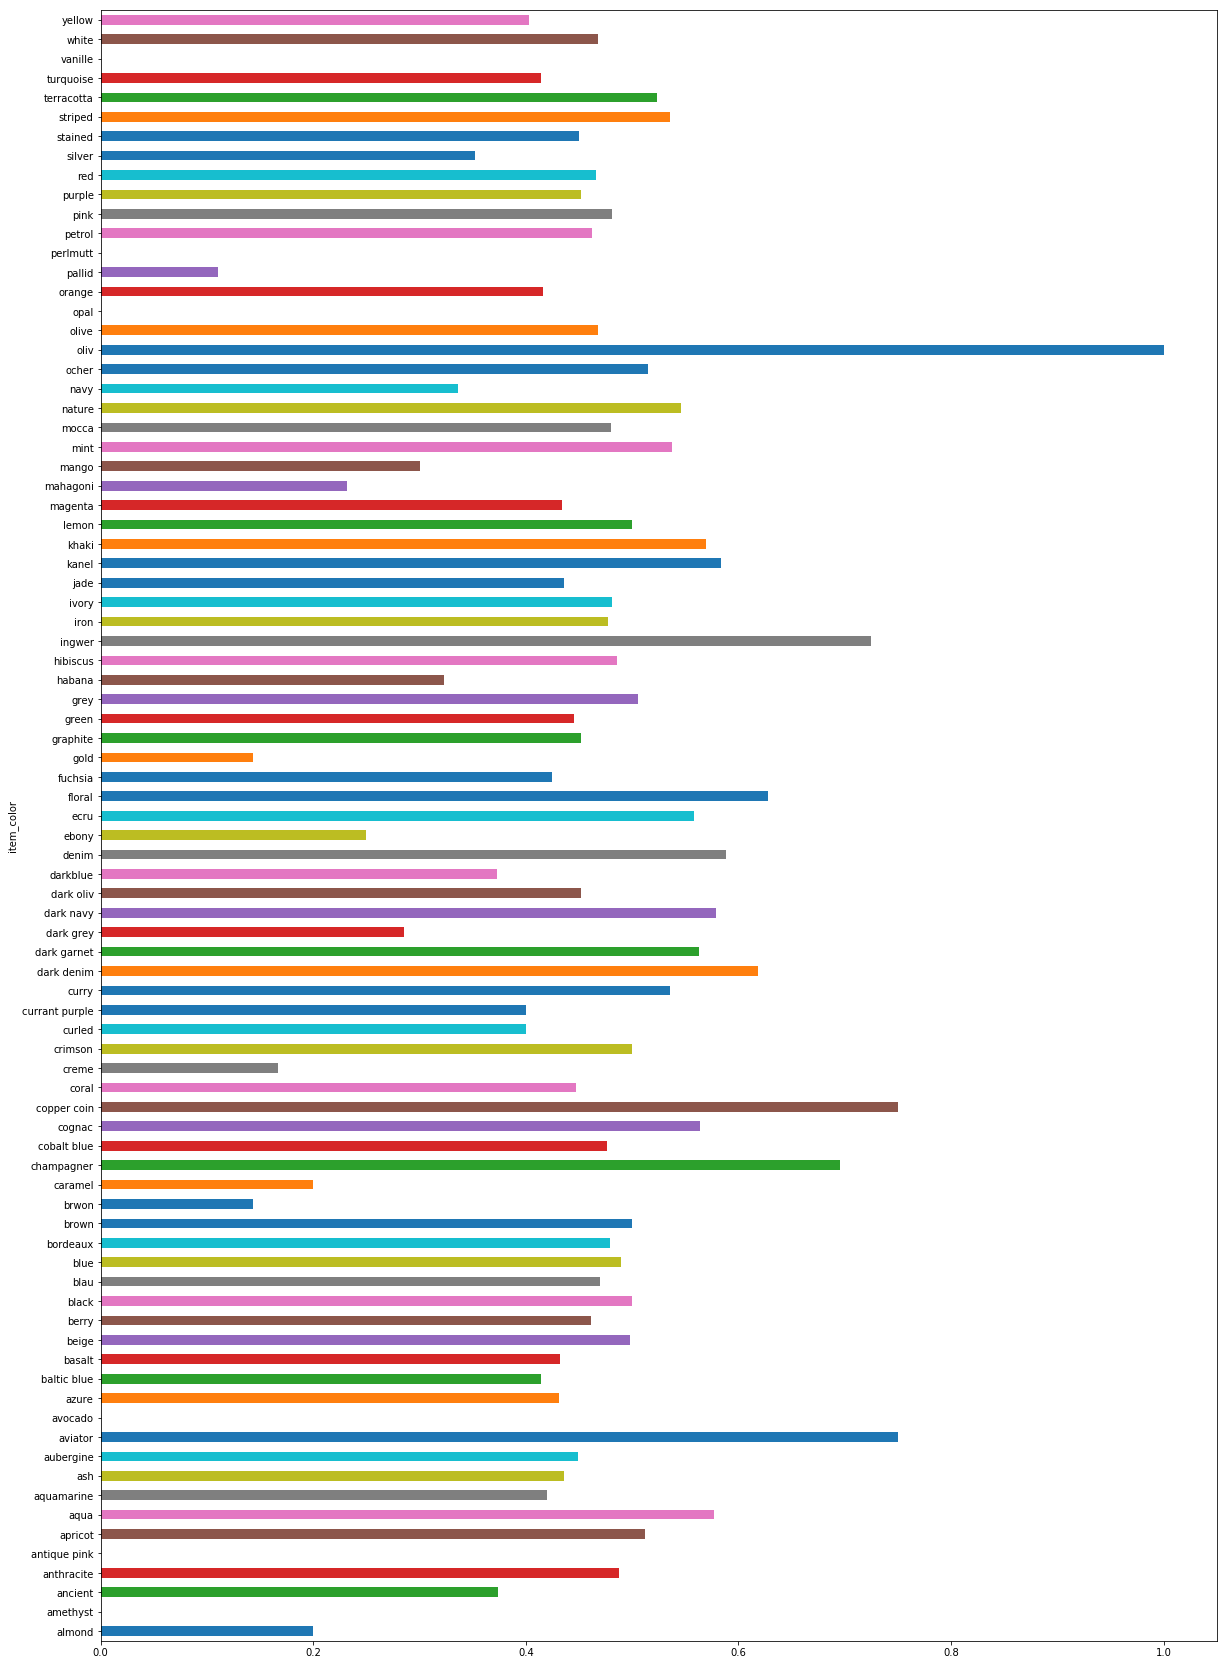

In [39]:
color = known.groupby("item_color")["return"].mean()
color.plot(kind="barh", figsize=(20, 30))

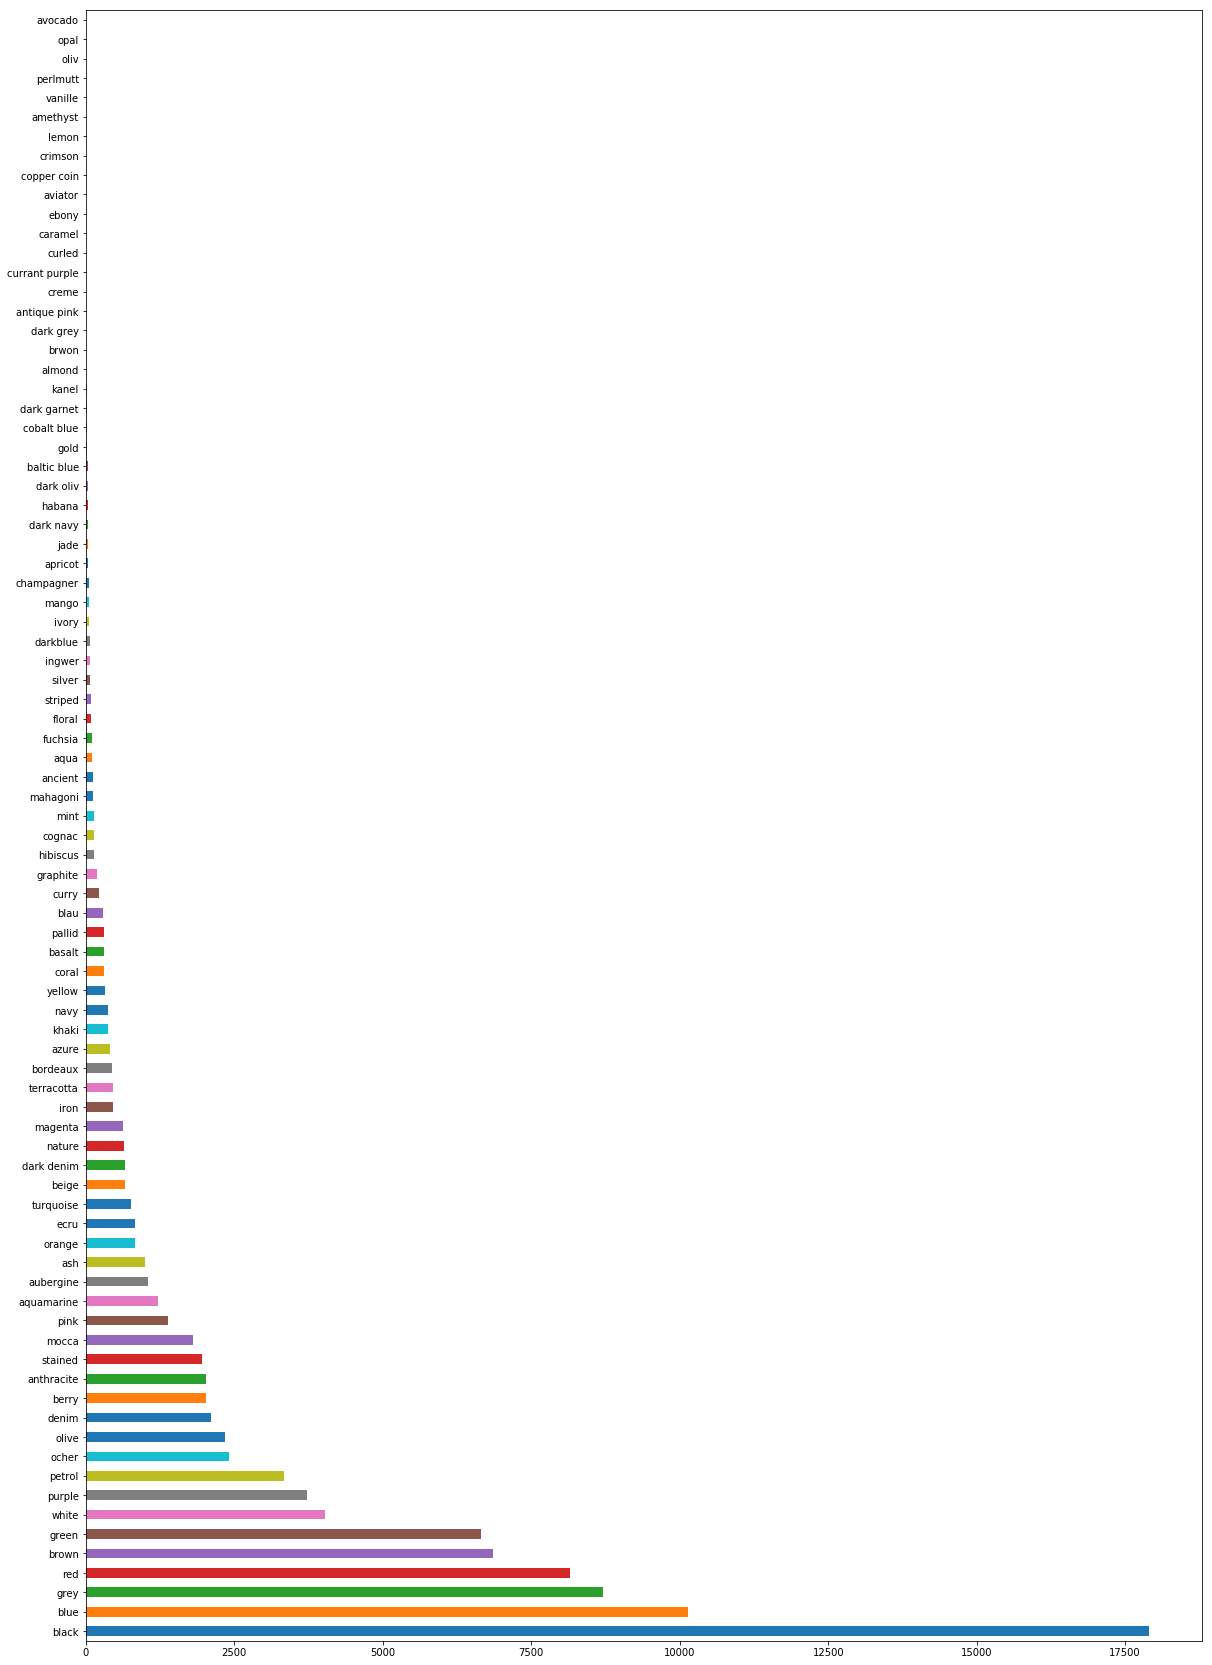

In [48]:
color_count = known.item_color.value_counts()
color_count.plot(kind="barh", figsize=(20, 30))

In [32]:
known.item_color.unique()

array(['red', 'grey', 'ecru', 'terracotta', 'petrol', 'purple', 'ocher',
       'black', 'aquamarine', 'mocca', 'blue', 'brown', 'aubergine',
       'white', 'green', 'berry', 'anthracite', 'stained', 'olive',
       'denim', 'iron', 'magenta', 'beige', 'ancient', 'dark denim',
       'nature', 'azure', 'basalt', 'blau', 'cognac', 'pink', 'ash',
       'navy', 'turquoise', 'mint', 'aqua', 'gold', 'striped', 'apricot',
       'darkblue', 'mahagoni', 'yellow', 'khaki', 'orange', 'dark grey',
       'graphite', 'champagner', 'mango', 'bordeaux', 'curry', 'coral',
       'pallid', 'fuchsia', 'dark oliv', 'silver', 'hibiscus', 'floral',
       'dark navy', 'jade', nan, 'ingwer', 'baltic blue', 'cobalt blue',
       'ivory', 'habana', 'creme', 'antique pink', 'avocado',
       'dark garnet', 'almond', 'caramel', 'currant purple', 'kanel',
       'ebony', 'aviator', 'brwon', 'opal', 'crimson', 'vanille', 'oliv',
       'lemon', 'copper coin', 'perlmutt', 'amethyst', 'curled'],
      dtype=obj